# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [20]:
import pandas as pd
import numpy as np

# Загрузка данных
df = pd.read_csv('data/Advertising.csv')

**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [21]:
# Проверка пропусков
print(df.isnull().sum())
# Удаление пропусков (если есть)
df = df.dropna()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64


**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [22]:
# Преобразование в массивы NumPy
X = df[['TV', 'radio', 'newspaper']].values
y = df['sales'].values

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [23]:
import numpy as np

X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [24]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(m, n)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., n$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{n} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{n} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{m} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{n}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{m}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [25]:
# Добавление единичного столбца
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)

# Нормализация данных
X = X / np.sqrt(np.sum(np.square(X), axis=0))

# Реализация координатного спуска
def coordinate_descent(X, y, num_iters=1000):
    m, n = X.shape
    w = np.zeros((n, 1))
    loss_history = []
    
    for i in range(num_iters):
        for k in range(n):
            # Прогноз без k-го признака
            h = X[:, :k] @ w[:k] + X[:, k+1:] @ w[k+1:]
            # Обновление k-го коэффициента
            w[k] = (X[:, k].T @ (y - h))
        
        # Расчет ошибки
        y_pred = X @ w
        loss = np.sum((y_pred - y) ** 2) / m
        loss_history.append(loss)
    
    return w, loss_history

w_cd, losses_cd = coordinate_descent(X, y)
print("Координатный спуск - Веса:", w_cd.flatten())

Координатный спуск - Веса: [ 4.15621720e+01  2.35422792e-13  1.10131442e+02  7.35286064e+01
 -5.50063841e-01]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [26]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[[ 20.78108602  20.78108602 110.13144155  73.52860638  -0.55006384]]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [27]:
# Масштабирование признаков
X_original = df[['TV', 'radio', 'newspaper']].values
X_scaled = (X_original - X_original.mean(axis=0)) / X_original.std(axis=0)
y = df['sales'].values

**Добавим единичный столбец**

In [28]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [29]:
# Функция MSE
def mse_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [30]:
# Наивный прогноз
naive_pred = np.mean(y)
print("MSE наивного прогноза:", mse_error(y, naive_pred))

MSE наивного прогноза: 27.085743750000002


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [31]:
# Функция прогноза
def lin_pred(X, w):
    return X @ w

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [32]:
# Шаг SGD
def stoch_grad_step(X, y, w, train_ind, eta=0.01):
    m = len(y)
    x_train = X[train_ind]
    y_pred = lin_pred(x_train, w)
    grad = 2 * x_train * (y_pred - y[train_ind]) / m
    return w - eta * grad

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [33]:
# Полный алгоритм SGD
def stochastic_gradient_descent(X, y, w0, eta=0.01, max_iter=100000, tol=1e-4):
    w = w0.copy()
    loss_history = []
    iter_count = 0
    prev_w = np.inf * np.ones_like(w0)
    
    while np.linalg.norm(w - prev_w) > tol and iter_count < max_iter:
        prev_w = w.copy()
        train_ind = np.random.randint(len(y))
        w = stoch_grad_step(X, y, w, train_ind, eta)
        y_pred = lin_pred(X, w)
        loss = mse_error(y, y_pred)
        loss_history.append(loss)
        iter_count += 1
    
    return w, loss_history

# Запуск SGD
w0 = np.zeros(X.shape[1])
w_sgd, losses_sgd = stochastic_gradient_descent(X, y, w0, eta=0.01, max_iter=100000)

print("SGD - Веса:", w_sgd)
print("MSE на последней итерации:", losses_sgd[-1])

SGD - Веса: [0.85386722 0.06037753 0.06037753 0.05908489 0.05751945 0.05143754]
MSE на последней итерации: 199.97536201446619


 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

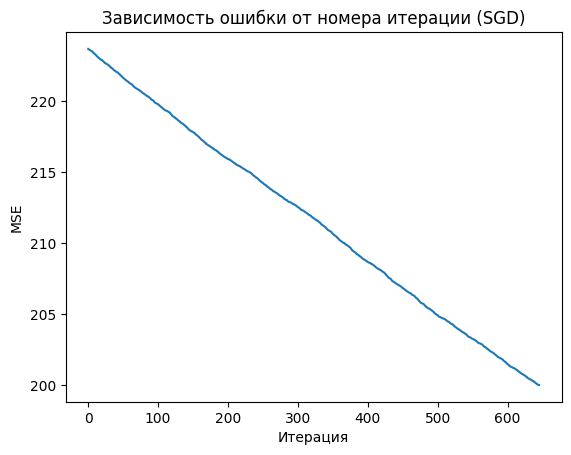

In [42]:
# График ошибок SGD
import matplotlib.pyplot as plt

plt.plot(losses_sgd)
plt.title('Зависимость ошибки от номера итерации (SGD)')
plt.xlabel('Итерация')
plt.ylabel('MSE')
plt.show()

**Выведите вектор весов, к которому сошелся метод.**

In [43]:
# Вывод вектора весов
print("Вектор весов SGD:", w_sgd)

Вектор весов SGD: [0.85386722 0.06037753 0.06037753 0.05908489 0.05751945 0.05143754]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [44]:
# Вывод среднеквадратичной ошибки на последней итерации
print("MSE на последней итерации SGD:", losses_sgd[-1])

MSE на последней итерации SGD: 199.97536201446619
